In [2]:
import numpy as np
from PIL import Image
import scipy
import matplotlib.pyplot as plt
from skimage import restoration

In [3]:
NAME = "amogus"
RADIUS = 30
test_small_image = np.array(Image.open(NAME + ".webp"))

In [4]:
def convkernel(x, y, sx, sy):
    return 1/(2*np.pi*sx*sy) * np.exp(-((x*x)/(sx*sx)+(y*y)/(sy*sy))/2)

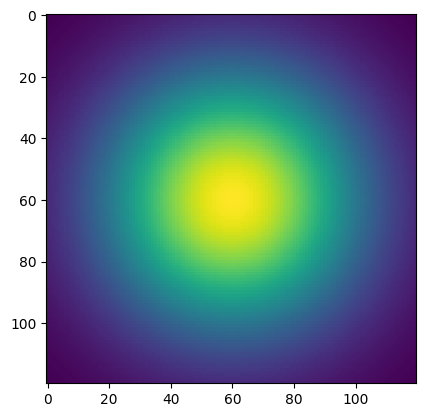

In [5]:
psf = convkernel(np.arange(-60, 60)[:,None], np.arange(-60, 60)[None,:], RADIUS, RADIUS)
plt.imshow(psf)

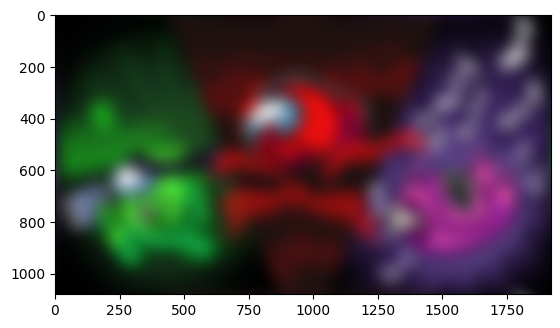

In [6]:
test_image_blur3 = np.transpose([scipy.signal.convolve2d(test_small_image[:,:,i], psf, "same", boundary="wrap") / 255 for i in range(3)], axes=[1,2,0])
plt.imshow(test_image_blur3)

In [7]:
preblur_img = Image.fromarray((test_image_blur3[:,:,0]*2147283647).astype(np.int32), mode="I")
preblur_img.save(NAME + "_preblur.tiff")

279081


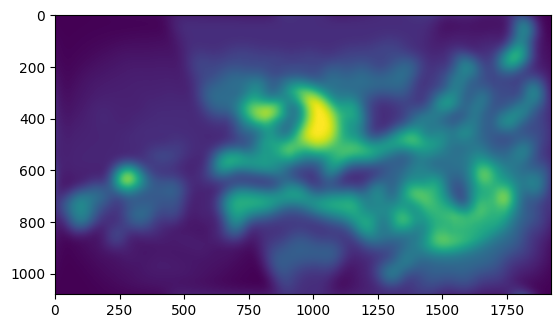

In [8]:
img_reloaded2 = np.array(Image.open(NAME + "_preblur.tiff"))
img_reloaded2_norm = img_reloaded2 / 2147483647
print(np.min(img_reloaded2))
plt.imshow(img_reloaded2_norm)

In [9]:
np.min(img_reloaded2)

np.int32(279081)

In [10]:
deconvolved,_ = restoration.unsupervised_wiener(img_reloaded2_norm, psf)

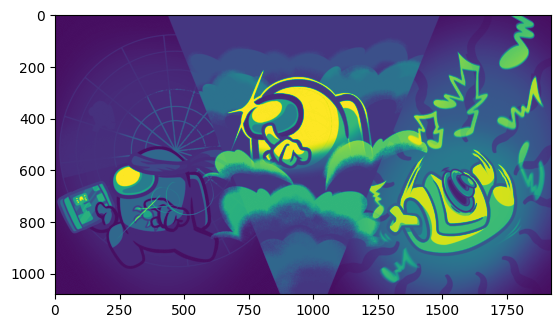

In [11]:
plt.imshow(deconvolved)

In [12]:
deconvolved = np.maximum(0, deconvolved)
deconvolved = np.minimum(1, deconvolved)

In [79]:
deconvolved_img = np.transpose([deconvolved, deconvolved, deconvolved], axes=[1,2,0])
output_img = Image.fromarray((deconvolved_img*255).astype(np.uint8))
output_img.save(NAME+"_output.png")